Mean Squared Error: 1.0
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1}


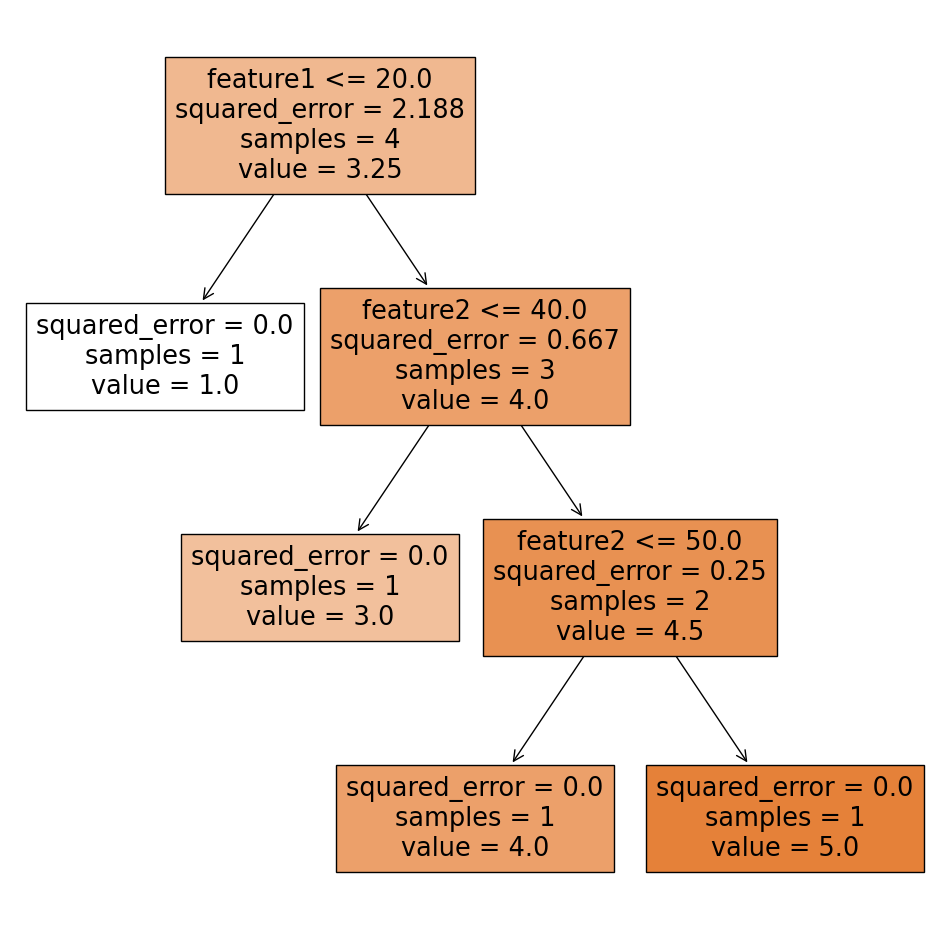

In [2]:
#EXAMPLE
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Example data
data = {
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [15, 25, 35, 45, 55],
    'target': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Splitting features and target
X = df.drop('target', axis=1)
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Predicting
y_pred = tree_regressor.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Tuning the model
parameters = {'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(tree_regressor, parameters, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

# Visualizing the tree
plt.figure(figsize=(12,12))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, filled=True)
plt.show()


In [15]:
#COMBINE DATA
import pandas as pd

def drop_last_section(trial):
    return '_'.join(trial.split('_')[:-1])

propertyData = pd.read_csv('property_data.csv')
propertyData.reset_index()
allData = pd.read_csv('allDataCopy_Humidity.csv')
allData.reset_index


propertyData['Modified_Trial'] = propertyData['Trial'].apply(drop_last_section)
combinedData = pd.merge(allData, propertyData, left_on='Sample', right_on='Modified_Trial', how='inner')
combinedData.drop(columns=['Modified_Trial'], inplace=True)

print(combinedData)
combinedData.to_csv('combinedData.csv')

          Date     Sample  Polymer Concentration Rounded  \
0   2024-02-23       10_4                             10   
1   2024-02-23       10_4                             10   
2   2024-02-23       10_5                             10   
3   2024-02-23       10_5                             10   
4   2024-02-23       10_5                             10   
5   2024-02-23       10_5                             10   
6   2024-02-28  10_6_day1                             10   
7   2024-02-28  10_6_day1                             10   
8   2024-02-28  10_6_day1                             10   
9   2024-02-28  10_6_day1                             10   
10  2024-02-29  10_6_day2                             10   
11  2024-02-29  10_6_day2                             10   
12  2024-02-29  10_6_day2                             10   
13  2024-02-29  10_6_day2                             10   
14  2024-02-29  10_6_day2                             10   
15  2024-03-01  10_6_day3               

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mean Squared Error: 1849.3320530868702


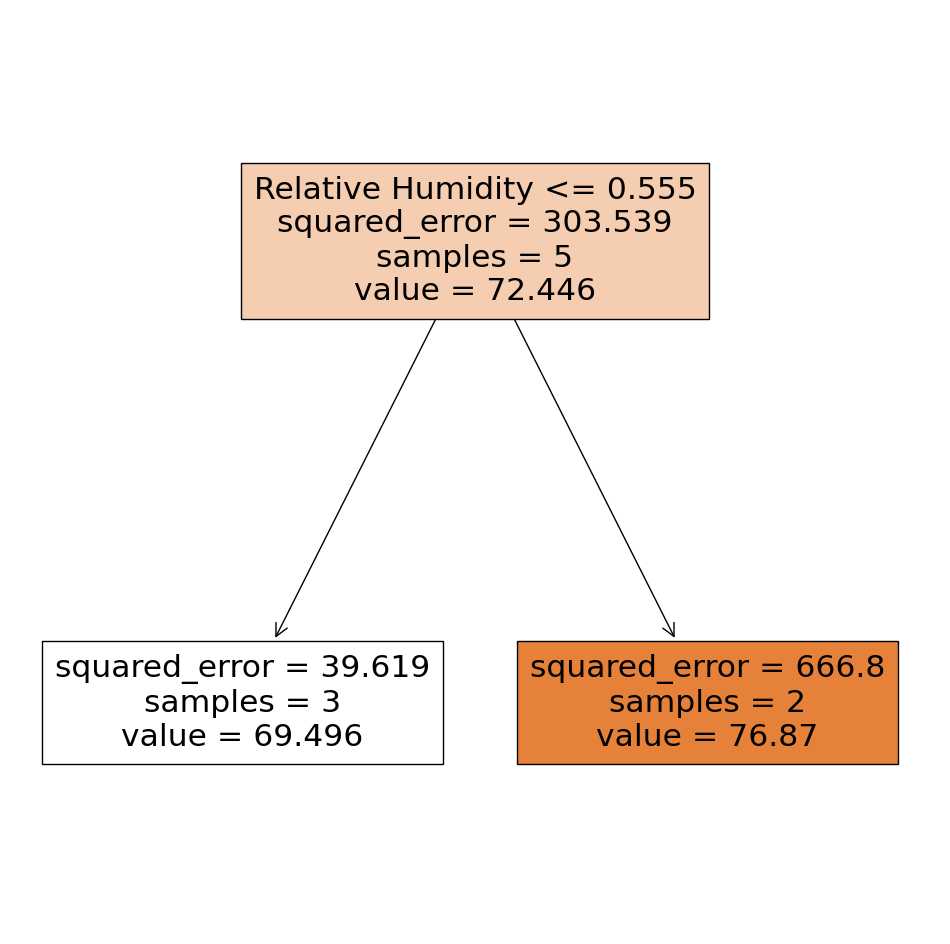

In [21]:
#CREATE TREE - 10wt% rounded
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Corrected the DataFrame filtering logic
combinedData_10 = combinedData[(combinedData['Polymer Concentration Rounded'] == 10) & (combinedData['Fit'] == True)]

# Splitting features and target
X = combinedData_10.drop(['Date', 
                          'Sample', 
                          'Polymer Concentration Rounded', 
                          'Polymer Concentration Real', 
                          'Wrinkles', 
                          'Fitting Success',
                          'Results',
                          'R Squared',
                          'Thickness_x',
                          'Observations',
                          'Solution production notes',
                          'Trial',
                          'Concentration',
                          'Heating',
                          'Thickness_y',
                          'Elastic Modulus',
                          'Yield Strength',
                          'Plateau Slope',
                          'Densification Slope',
                          'Changepoint',
                          'Fit'], axis=1)
y = combinedData_10['Elastic Modulus']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Using the best estimator found to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the tree of the best estimator
plt.figure(figsize=(12,12))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, filled=True)
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mean Squared Error: 146.6421576169445


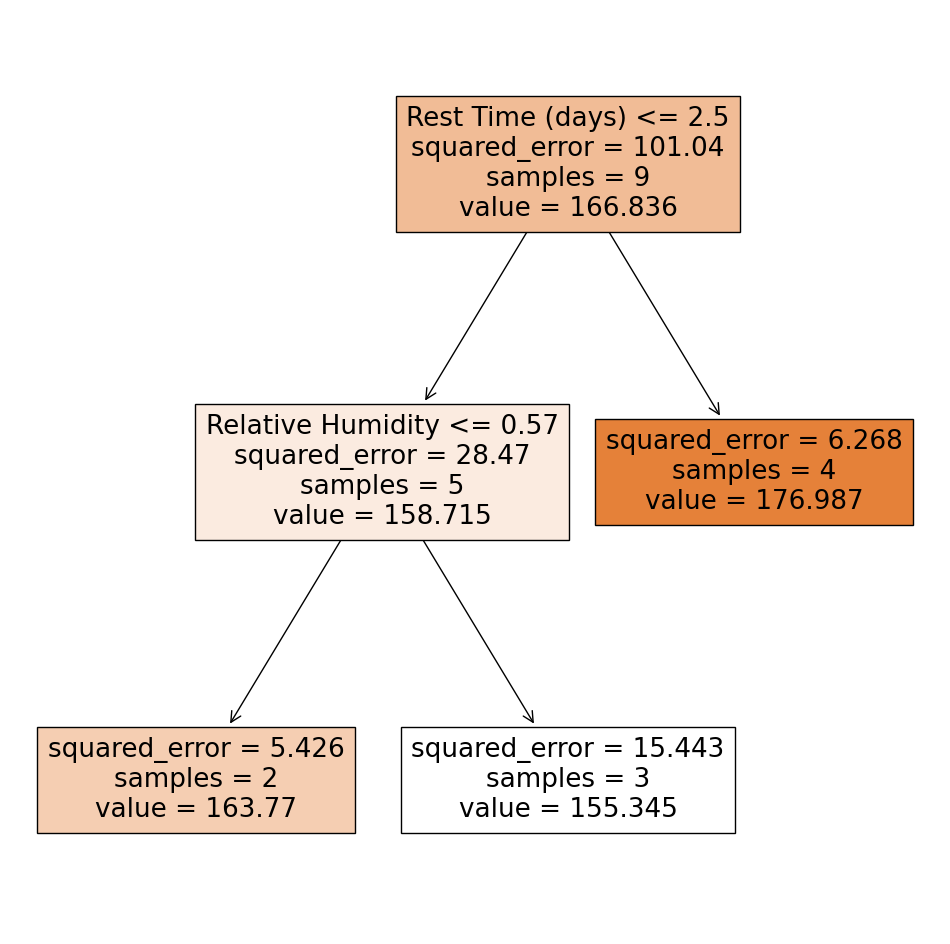

In [22]:
#CREATE TREE - 17wt% rounded
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Corrected the DataFrame filtering logic
combinedData_17 = combinedData[(combinedData['Polymer Concentration Rounded'] == 17) & (combinedData['Fit'] == True)]

# Splitting features and target
X = combinedData_17.drop(['Date', 
                          'Sample', 
                          'Polymer Concentration Rounded', 
                          'Polymer Concentration Real', 
                          'Wrinkles', 
                          'Fitting Success',
                          'Results',
                          'R Squared',
                          'Thickness_x',
                          'Observations',
                          'Solution production notes',
                          'Trial',
                          'Concentration',
                          'Heating',
                          'Thickness_y',
                          'Elastic Modulus',
                          'Yield Strength',
                          'Plateau Slope',
                          'Densification Slope',
                          'Changepoint',
                          'Fit'], axis=1)
y = combinedData_17['Elastic Modulus']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Using the best estimator found to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the tree of the best estimator
plt.figure(figsize=(12,12))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, filled=True)
plt.show()